In [1]:
import numpy as np
from sklearn.linear_model import lars_path

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

In [2]:
p = 1000
n = 10000
x = np.random.rand(n, p)
tx = x.T
b = np.random.rand(p) * 2 - 1
true_y = np.matmul(x, b)
y = np.matmul(tx, true_y)

In [3]:
a = np.matmul(tx, x)

In [6]:
def load_data(file_path, dtype='int32', shape=None):
    return np.memmap(file_path, dtype=dtype, shape=shape)

In [8]:
nb_modalities = 1372
cov = load_data('./data/covproduct.dat', dtype='double', shape=(nb_modalities, nb_modalities))
yp = load_data('./data/yp.dat', dtype='double', shape=(nb_modalities))

In [20]:
coeffs, residuals, rank, s = np.linalg.lstsq(cov, yp, rcond=None)

array([2.45291472e+08, 1.21510203e+07, 5.26189726e+06, ...,
       9.20772084e-09, 7.96093280e-09, 1.96477053e-09])

In [270]:
def remove_variables(m, v, delete_features):
    mask = np.ones(p, dtype=bool)
    mask[delete_features] = False
    return m[mask,:][:,mask], v[mask]

In [273]:
features = set(range(p))
delete_features = set()
lasso_path = np.zeros(p*p).reshape(p, p)

for i in range(p):
    sorted_features = sorted(features - delete_features)
    #print(sorted_features)
    m, my = remove_variables(a, y, sorted(delete_features))
    betas = np.linalg.solve(m, my)
    bmin = np.argmin(np.abs(betas))
    amin = sorted_features[bmin]
    print(amin, round(betas[bmin], 4))
    delete_features.add(amin)
    true_betas = np.zeros(p)
    true_betas[sorted_features] = betas
    lasso_path[p - i - 1] = true_betas

    error = np.matmul(x, true_betas) - true_y
    rmse = np.sqrt(np.mean(np.square(error)))
    #print(rmse, np.sqrt(np.mean(np.square(true_y))))
    print("----------")

254 0.0012
----------
435 0.0017
----------
92 -0.002
----------
683 -0.0021
----------
150 -0.0026
----------
572 0.0028
----------
986 -0.0038
----------
943 -0.0043
----------
161 0.0052
----------
803 -0.0066
----------
138 0.0079
----------
766 0.0081
----------
715 -0.008
----------
91 0.0094
----------
540 -0.0099
----------
485 0.0108
----------
547 0.0112
----------
961 -0.0116
----------
216 0.0122
----------
182 0.0129
----------
437 0.014
----------
790 -0.0149
----------
414 0.0152
----------
219 -0.0161
----------
695 -0.0161
----------
559 -0.0166
----------
727 -0.0169
----------
659 -0.0175
----------
356 -0.0186
----------
976 0.0205
----------
189 -0.0208
----------
436 -0.0217
----------
917 -0.0235
----------
545 -0.0241
----------
392 0.0245
----------
679 0.0273
----------
172 0.0287
----------
270 -0.0295
----------
847 -0.03
----------
960 0.0306
----------
864 -0.0306
----------
599 0.0317
----------
595 0.0334
----------
38 -0.0374
----------
722 -0.0396
----

58 0.3761
----------
713 0.3745
----------
691 -0.3785
----------
769 -0.3912
----------
170 0.383
----------
552 0.3879
----------
180 -0.3883
----------
605 0.3857
----------
797 0.3872
----------
887 0.3872
----------
921 0.3942
----------
684 0.3946
----------
39 0.3876
----------
932 -0.3919
----------
171 0.3914
----------
553 0.3959
----------
463 0.3961
----------
999 -0.3972
----------
78 0.4098
----------
246 0.4047
----------
487 0.3995
----------
496 0.4039
----------
774 -0.4018
----------
299 0.4068
----------
409 0.4064
----------
810 -0.4079
----------
235 -0.405
----------
405 -0.4083
----------
354 0.407
----------
415 0.4086
----------
927 -0.4091
----------
689 0.4135
----------
231 -0.4094
----------
25 -0.4128
----------
298 0.4131
----------
895 -0.4198
----------
796 0.4169
----------
232 0.4143
----------
27 0.4206
----------
612 -0.4163
----------
12 0.4118
----------
364 0.4183
----------
277 -0.4155
----------
107 0.4128
----------
820 -0.4126
----------
504

----------
101 0.7682
----------
374 -0.7627
----------
56 0.7708
----------
855 -0.7672
----------
505 -0.7718
----------
989 0.7719
----------
228 -0.7762
----------
607 0.7771
----------
665 -0.7713
----------
754 0.7736
----------
478 -0.7761
----------
655 0.7722
----------
501 -0.7556
----------
602 0.7678
----------
632 -0.7626
----------
861 0.7614
----------
110 -0.759
----------
844 -0.756
----------
312 0.7469
----------
406 -0.7694
----------
749 0.7628
----------
11 0.7732
----------
716 -0.7686
----------
428 0.7661
----------
947 -0.7654
----------
643 0.7626
----------
300 -0.7667
----------
234 0.7796
----------
140 -0.7722
----------
795 0.7817
----------
523 0.7761
----------
249 -0.7687
----------
992 0.7786
----------
451 -0.7853
----------
204 0.7788
----------
399 -0.7788
----------
145 0.7811
----------
537 0.7947
----------
381 -0.7831
----------
725 -0.7897
----------
510 0.7953
----------
557 -0.7976
----------
664 0.8004
----------
617 -0.797
----------
885 

In [260]:
b

array([-0.03215381, -0.06072813,  0.48034788, -0.03138814,  0.6405668 ,
        0.330807  ,  0.48724296,  0.95693328, -0.24750902, -0.32334076])

[3 0 1 8 9 5 2 6 4 7]


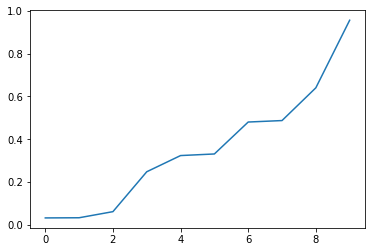

In [263]:
o = np.argsort(np.abs(b))
print(o)
plt.plot(np.arange(len(o)), np.abs(b)[o])
plt.show()

[9 8 3 1 0 4 5 6 2 7]


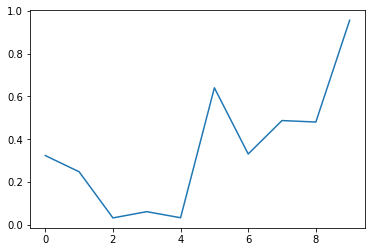

In [266]:
o = np.argsort(np.sum((a * y), axis=0))
print(o)
plt.plot(np.arange(len(o)), np.abs(b)[o])
plt.show()

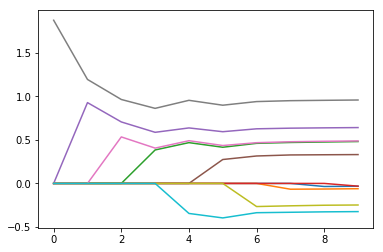

In [232]:
ar = np.arange(p)

for i in ar:
    plt.plot(ar, lasso_path[:,i])
plt.show()

In [233]:

alphas, active, coef_path_lars = lars_path(x, true_y, method='lasso')

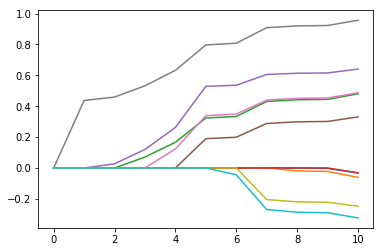

In [234]:
ar = np.arange(p + 1)

for i in range(p):
    plt.plot(ar, coef_path_lars[i, :])
plt.show()

In [235]:
coef_path_lars = np.stack(coef_path_lars)
for i in range(p+1):
    true_betas = coef_path_lars[:,p - i]
    error = np.matmul(x, true_betas) - true_y
    rmse = np.sqrt(np.mean(np.square(error)))
    print(true_betas)
    print(rmse, np.sqrt(np.mean(np.square(true_y))))
    print("----------")

[-0.03215381 -0.06072813  0.48034788 -0.03138814  0.6405668   0.330807
  0.48724296  0.95693328 -0.24750902 -0.32334076]
2.4612010381384023e-15 1.1736068406288442
----------
[-0.00287285 -0.02242808  0.44454149  0.          0.61558687  0.30149684
  0.45352719  0.92295632 -0.22183915 -0.2897635 ]
0.02859673832202352 1.1736068406288442
----------
[ 0.         -0.01870859  0.44183712  0.          0.61363883  0.29906841
  0.45087814  0.92026134 -0.21931223 -0.28653667]
0.030849198427442683 1.1736068406288442
----------
[ 0.          0.          0.43090913  0.          0.60573727  0.28827282
  0.44021075  0.9089189  -0.20457025 -0.26908864]
0.04053068629266346 1.1736068406288442
----------
[ 0.          0.          0.33369666  0.          0.53601539  0.1992152
  0.3494438   0.80817039  0.         -0.04403887]
0.14181960106807248 1.1736068406288442
----------
[0.         0.         0.3235304  0.         0.52885273 0.18982323
 0.3387584  0.79702575 0.         0.        ]
0.1532466911435316 1.

In [236]:
sorted_features = [5, 9]
m, my = remove_variables(a, y, [0,1,2,3,4,6,7,8])
betas = np.linalg.solve(m, my)

true_betas = np.zeros(p)
true_betas[sorted_features] = betas

error = np.matmul(x, true_betas) - true_y
print(error)
rmse = np.sqrt(np.mean(np.square(error)))
print(rmse, np.sqrt(np.mean(np.square(true_y))))

[ 3.86863924e-01 -4.07784267e-01 -4.70375905e-01  1.19418921e-01
 -2.21798321e-01  1.10927057e+00 -5.38459296e-01  5.00475194e-01
  1.25664547e-01 -9.61584488e-02  2.30199455e-01  6.95958325e-01
 -9.37942764e-01  3.54686671e-01  4.63977888e-01  1.72153889e-01
  6.39204217e-01 -9.57413667e-01  4.32981993e-01  3.12066741e-02
  7.13311254e-02  6.51299840e-01 -1.09737394e-01 -4.06129841e-01
 -1.53277990e+00  8.27256403e-03 -7.37008257e-01  8.17043052e-01
 -5.93300659e-01  4.81174154e-01 -1.24448894e-01 -8.42017985e-02
  1.88389029e-01 -1.23171326e-01 -1.52154303e-02  3.42364765e-02
  2.86145620e-01 -8.71555203e-01  2.17668298e-01 -9.18412748e-01
 -9.79501365e-02 -1.46063371e-01 -6.63370004e-01 -8.22813865e-01
  1.96223030e-01  4.07656042e-01  2.22321625e-01 -1.06303421e+00
 -1.43835195e-01  3.04058895e-01 -1.68346878e-01  4.32093876e-01
 -1.48522920e+00  3.79963611e-01  5.12488321e-01  2.27893780e-01
  9.08145757e-02 -3.30889305e-01  3.01119618e-01 -7.22812664e-01
 -7.85859914e-01 -3.51858